<a href="https://colab.research.google.com/github/sreeharsha243/BigData/blob/main/Bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DAY-01

#create a list of cricket player names and sort them

cplayers=["virat","rahul","ashwin","rohit","Jadeja"]
splayers=sorted(cplayers,key=lambda arg:arg.lower())
splayers


['ashwin', 'Jadeja', 'rahul', 'rohit', 'virat']

In [ ]:
#list the players whose name contain 'h'

list(filter(lambda arg:'h' in arg,cplayers))

['rahul', 'ashwin', 'rohit']

In [ ]:
#list the players whose name length is >5

list(filter(lambda arg:len(arg)>5,cplayers))

['ashwin', 'Jadeja']

In [ ]:
#map each case to upper case

list(map(lambda item:item.upper(),cplayers))

['VIRAT', 'RAHUL', 'ASHWIN', 'ROHIT', 'JADEJA']

In [ ]:
#map each name to (name,length)
#virat ->(virat,5)

list(map(lambda name:(name,len(name)),cplayers))

[('virat', 5), ('rahul', 5), ('ashwin', 6), ('rohit', 5), ('Jadeja', 6)]

In [ ]:
#Reduce all cricket players names to a single string

from functools import reduce
reduce(lambda a,b:a+b,cplayers)

'viratrahulashwinrohitJadeja'

In [ ]:
l1=[1,3,5,2,6]
reduce(max,l1)

6

In [ ]:
#Find the cricket player with maximum length

l1=list(map(lambda name:(len(name),name),cplayers))
l1.sort(reverse=True)
print(l1)
l2=list(filter(lambda x:(x[0]==l1[0][0]),l1))
print(l2)
l3=list(map(lambda w:(w[1],w[0]),l2))
print(l3)
l3.sort()
print(l3)
print(l3[0][0])



[(6, 'ashwin'), (6, 'Jadeja'), (5, 'virat'), (5, 'rohit'), (5, 'rahul')]
[(6, 'ashwin'), (6, 'Jadeja')]
[('ashwin', 6), ('Jadeja', 6)]
[('Jadeja', 6), ('ashwin', 6)]
Jadeja


In [ ]:
# INTERACTIVE PTYHON NOTEBOOK
# DAY-02
#python install packager
# ! define as python as commands

!pip install pyspark



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=5ce7893ff656a851757320759f5d133fd7c16a27097a3d94d9165e391ab18efa
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
from pyspark import SparkContext
sc=SparkContext.getOrCreate()


In [ ]:
# range(1000) means 0,1,2,3,.....,999

rdd=sc.parallelize(range(1000))
print(rdd.take(15))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:
odd=rdd.filter(lambda n:n%2!=0)
print(odd.take(15))
even=rdd.filter(lambda n:n%2==0)
even.take(15)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

In [ ]:
blog=sc.textFile('/content/sample_data/blogtt.txt')
blog.take(5)
#or we can use blog.collect() for whole text file

['Think of it for a moment – 1 Qunitillion = 1 Million Billion! Can you imagine how many drives / CDs / Blue-ray DVDs would be required to store them? It is difficult to imagine this scale of data generation even as a data science professional. While this pace of data generation is very exciting,  it has created entirely new set of challenges and has forced us to find new ways to handle Big Huge data effectively.',
 '',
 '',
 'Big Data is not a new phenomena. It has been around for a while now. However, it has become really important with this pace of data generation. In past, several systems were developed for processing big data. Most of them were based on MapReduce framework. These frameworks typically rely on use of hard disk for saving and retrieving the results. However, this turns out to be very costly in terms of time and speed.',
 '']

In [ ]:
#Filter blank lines from RDD and create another stripped RDD
# it was used to remove blank lines from text file
srdd=blog.filter(lambda l:l.strip())
srdd.take(5)

['Think of it for a moment – 1 Qunitillion = 1 Million Billion! Can you imagine how many drives / CDs / Blue-ray DVDs would be required to store them? It is difficult to imagine this scale of data generation even as a data science professional. While this pace of data generation is very exciting,  it has created entirely new set of challenges and has forced us to find new ways to handle Big Huge data effectively.',
 'Big Data is not a new phenomena. It has been around for a while now. However, it has become really important with this pace of data generation. In past, several systems were developed for processing big data. Most of them were based on MapReduce framework. These frameworks typically rely on use of hard disk for saving and retrieving the results. However, this turns out to be very costly in terms of time and speed.',
 'On the other hand, Organizations have never been more hungrier to add a competitive differentiation through understanding this data and offering its customer

In [ ]:
#to print the number of lines

print(blog.count(),srdd.count())

648 259


In [ ]:
#Map each lines to list of words (use map and flatMap)

wrdd=srdd.flatMap(lambda l:l.split(' '))
wrdd.take(5)

['Think', 'of', 'it', 'for', 'a']

In [ ]:
#group each word by first letter

grdd=wrdd.groupBy(lambda w:w[0:1])
grdd.take(5)

[('i', <pyspark.resultiterable.ResultIterable at 0x7fb7dea46230>),
 ('1', <pyspark.resultiterable.ResultIterable at 0x7fb7dea47250>),
 ('=', <pyspark.resultiterable.ResultIterable at 0x7fb7dea462f0>),
 ('C', <pyspark.resultiterable.ResultIterable at 0x7fb7dea44e80>),
 ('y', <pyspark.resultiterable.ResultIterable at 0x7fb7dea45600>)]

In [ ]:
#Reverse count and letter
rgrdd=grdd.map(lambda w:(len(w[1]),w[0]))
rgrdd.take(5)

[(357, 'i'), (18, '1'), (41, '='), (25, 'C'), (35, 'y')]

In [ ]:
#Sort by count in reverse order

srgdd=rgrdd.sortByKey(False)
srgdd.take(5)

[(672, 't'), (507, 'a'), (357, 'i'), (303, 'c'), (277, 's')]

In [ ]:
stopwords=["in","on","for","the","a","to","of","and","is"]
stwrdd=wrdd.filter(lambda w:w not in stopwords)
stwrdd.count(),wrdd.count()

(4300, 5281)

In [ ]:
import string
pstpwrdd=stwrdd.map(lambda w:w.translate(str.maketrans('','',string.punctuation)))
stwrdd.count(),pstpwrd.count()

(4300, 4300)

In [ ]:
#group and sort

grdd=pstpwrdd.groupBy(lambda w:w)
mrdd=grdd.map(lambda x:(len(x[1]),x[0]))
srdd=mrdd.sortByKey(False)
srdd.take(10)

[(118, ''),
 (86, 'Spark'),
 (73, 'we'),
 (69, 'data'),
 (54, 'can'),
 (51, 'this'),
 (50, 'are'),
 (50, 'Apache'),
 (41, 'RDD'),
 (39, 'which')]

In [ ]:
#demostrate sampling of RDDs
samplerdd=pstpwrdd.sample(False,0.5,42)
pstpwrdd.count(),samplerdd.count()

(4300, 2127)

In [ ]:
samplerdd1=pstpwrdd.sample(True,0.3,42)#30% random samples
samplerdd2=pstpwrdd.sample(True,0.3,43)#30%
usample=samplerdd1.union(samplerdd2)
isample=samplerdd1.intersection(samplerdd2)
d1sample=samplerdd1.subtract(samplerdd2)
d2sample=samplerdd2.subtract(samplerdd1)
samplerdd1.count(),samplerdd2.count(),usample.count(),isample.count(),d1sample.count(),d2sample.count()

(1287, 1260, 2547, 316, 331, 317)

In [ ]:
rdd=sc.textFile('/content/sample_data/u.user.txt')

rdd.take(5)

['1|24|M|technician|85711',
 '2|53|F|other|94043',
 '3|23|M|writer|32067',
 '4|24|M|technician|43537',
 '5|33|F|other|15213']

In [ ]:
grdd=rdd.groupBy(lambda l:l.split('|')[2])
grdd.take(5)
rgrdd=grdd.map(lambda l:(len(l[1]),l[0]))
rgrdd.take(5)


[(670, 'M'), (273, 'F')]

In [ ]:
grdd=rdd.groupBy(lambda l:l.split('|')[3])
grdd.take(5)
rgrdd=grdd.map(lambda l:(len(l[1]),l[0]))
rgrdd=rgrdd.sortByKey(False)
rrgrdd=rgrdd.map(lambda l:(l[1],l[0]))
rrgrdd.take(10)


[('student', 196),
 ('other', 105),
 ('educator', 95),
 ('administrator', 79),
 ('engineer', 67),
 ('programmer', 66),
 ('librarian', 51),
 ('writer', 45),
 ('executive', 32),
 ('scientist', 31)]

In [ ]:
# find average age of users
agerdd=rdd.map(lambda l:int(l.split('|')[1]))
average=agerdd.mean()
filterbyage=rdd.filter(lambda l:float(l.split('|')[1])>average)
filterbyage.take(5)
rdd.count(),filterbyage.count()

(943, 399)

In [ ]:
# DAY-03
# Structured dats using CSV(comma separated values)

!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=38706f7c9f51918cacd8af5a7de4f95c64eb6cea9ac911cc010d8995f5d45ee6
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
from pyspark.sql.session import SparkSession
sess=SparkSession.builder.getOrCreate()
train=sess.read.csv('/content/sample_data/train - train.csv',header=True)
train.count()
train.printSchema()
train.columns

root
 |-- User_ID: string (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Product_Category_1: string (nullable = true)
 |-- Product_Category_2: string (nullable = true)
 |-- Product_Category_3: string (nullable = true)
 |-- Purchase: string (nullable = true)



['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [ ]:
# Find distinct products

train.select('Product_ID').distinct().count()
train.select('Product_ID').distinct().show(5)

+----------+
|Product_ID|
+----------+
|  P0098242|
| P00281742|
| P00026042|
| P00015342|
| P00159842|
+----------+
only showing top 5 rows



In [ ]:
# get descriptive statistics of purchase column

train.select('Purchase').describe().show()

+-------+-----------------+
|summary|         Purchase|
+-------+-----------------+
|  count|           550068|
|   mean|9263.968712959126|
| stddev|5023.065393820575|
|    min|            10000|
|    max|             9999|
+-------+-----------------+



In [ ]:
#making our owm schema

import pyspark.sql.types as typ
labels=[
    ('User_ID',typ.StringType()),
    ('Product_ID',typ.StringType()),
    ('Gender',typ.StringType()),
    ('Age',typ.StringType()),
    ('Occupation',typ.IntegerType()),
    ('City_Category',typ.StringType()),
    ('Stay_In_Current_City_Years',typ.StringType()),
    ('Marital_Status',typ.IntegerType()),
    ('Product_Category_1',typ.StringType()),
    ('Product_Category_2',typ.StringType()),
    ('Product_Category_3',typ.StringType()),
    ('Purchase',typ.IntegerType())
]
s=typ.StructType([
    typ.StructField(e[0],e[1],False) for e in labels
])
train=sess.read.csv('/content/sample_data/train - train.csv',header=True,schema=s)
train.printSchema()


root
 |-- User_ID: string (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: string (nullable = true)
 |-- Product_Category_2: string (nullable = true)
 |-- Product_Category_3: string (nullable = true)
 |-- Purchase: integer (nullable = true)



In [ ]:
train.select('Purchase').describe().show()

+-------+-----------------+
|summary|         Purchase|
+-------+-----------------+
|  count|           550068|
|   mean|9263.968712959126|
| stddev|5023.065393820575|
|    min|               12|
|    max|            23961|
+-------+-----------------+



In [ ]:
# find the transactions whose purchase amt exceeds 15000

train.filter(train.Purchase>15000).show()

+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|  Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1000001| P00248942|     F| 0-17|        10|            A|                         2|             0|                 1|                 6|                14|   15200|
|1000003| P00193542|     M|26-35|        15|            A|                         3|             0|                 1|                 2|              null|   15227|
|1000004| P00184942|     M|46-50|         7|            B|                         2|             1|                 1|                 8|                17|   19215

In [ ]:
# give me details whose marital status is 1

train.filter(train.Marital_Status==0).count()

324731

In [ ]:
#Get the correlation between age gender: we can identify using crosstab

train.crosstab('Age','Gender').show()

+----------+-----+------+
|Age_Gender|    F|     M|
+----------+-----+------+
|     18-25|24628| 75032|
|     26-35|50752|168835|
|      0-17| 5083| 10019|
|     46-50|13199| 32502|
|     51-55| 9894| 28607|
|     36-45|27170| 82843|
|       55+| 5083| 16421|
+----------+-----+------+



In [ ]:
#Find the mean purchase of each age group
# count the number of records of each group

train.groupBy('Age').agg({'Purchase':'Mean'}).show()
train.groupBy('Age').count().show()

+-----+-----------------+
|  Age|    avg(Purchase)|
+-----+-----------------+
|18-25|9169.663606261289|
|26-35|9252.690632869888|
| 0-17|8933.464640444974|
|46-50|9208.625697468327|
|51-55|9534.808030960236|
|36-45|9331.350694917874|
|  55+|9336.280459449405|
+-----+-----------------+

+-----+------+
|  Age| count|
+-----+------+
|18-25| 99660|
|26-35|219587|
| 0-17| 15102|
|46-50| 45701|
|51-55| 38501|
|36-45|110013|
|  55+| 21504|
+-----+------+



In [ ]:
#Order the train results by current stay in yrs:

from pyspark.sql.functions import col
train.orderBy(col('Stay_In_Current_City_Years').desc()).show()

+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|  Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1001330| P00085342|     M|  55+|         1|            C|                        4+|             0|                10|                13|              null|   23461|
|1000008| P00156442|     M|26-35|        12|            C|                        4+|             1|                 8|              null|              null|    9872|
|1001333| P00071242|     M|26-35|        17|            A|                        4+|             0|                 1|                15|                16|    4286

In [ ]:
#Adding a new column to data frame:

train=train.withColumn('gst_pa',train.Purchase*1.18)
train.columns

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase',
 'gst_pa']

In [ ]:
train.select('Purchase','gst_pa').show(3)

+--------+------------------+
|Purchase|            gst_pa|
+--------+------------------+
|    8370|            9876.6|
|   15200|           17936.0|
|    1422|1677.9599999999998|
+--------+------------------+
only showing top 3 rows



In [ ]:
# drop an existing column

train=train.drop('gst_pa')
train.columns

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [ ]:
#Converting data frame to table:

train.createOrReplaceTempView('train_table')

In [ ]:
#sql query

from pyspark import SparkContext,SQLContext
sc=SparkContext.getOrCreate()
sq=SQLContext(sc)
sq.sql("select Age,COUNT(*) AS C from train_table group by age order by c desc").show()

+-----+------+
|  Age|     C|
+-----+------+
|26-35|219587|
|36-45|110013|
|18-25| 99660|
|46-50| 45701|
|51-55| 38501|
|  55+| 21504|
| 0-17| 15102|
+-----+------+



In [ ]:
# read a JSON file

jsondf=sess.read.option("multiline","true").json('/content/sample_data/student.json')
jsondf.show()

+-------+----+--------+---+
|   mode|name|   topic|usn|
+-------+----+--------+---+
| online|  n1|Big data| u1|
|offline|  n2|Big data| u2|
| online|  n3|      AI| u3|
| online|  n4|      AI| u4|
+-------+----+--------+---+



In [ ]:
jsondf.groupBy("topic").count().show()

+--------+-----+
|   topic|count|
+--------+-----+
|      AI|    2|
|Big data|    2|
+--------+-----+



In [ ]:
# Find people who are doing online

jsondf.filter(jsondf.mode=="online").show()

+------+----+--------+---+
|  mode|name|   topic|usn|
+------+----+--------+---+
|online|  n1|Big data| u1|
|online|  n3|      AI| u3|
|online|  n4|      AI| u4|
+------+----+--------+---+



In [ ]:
# convert data frame to rdd and write to csv

ftrain=train.filter(train.Purchase>20000)
frdd=ftrain.rdd
frdd.saveAsTextFile('/context/sample_data/f.txt')

In [ ]:
# DAY-04

!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=e4ccffaafe86aa7e74bc885a6684a17f24c10641dff969c8b4afa9dad75deae8
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
#Drop duplicates

from pyspark.sql.session import SparkSession
sess=SparkSession.builder.getOrCreate()
df=sess.createDataFrame([
    (1,144.5,5.9,33,'M'),
    (2,167.2,5.4,45,'M'),
    (3,124.1,5.2,23,'F'),
    (4,144.5,5.9,33,'M'),
    (5,133.2,5.7,54,'F'),
    (3,124.1,5.2,23,'F'),
    (5,129.2,5.3,42,'M'),
],['id','weight','height','age','gender'])

df.show()
df.count()

+---+------+------+---+------+
| id|weight|height|age|gender|
+---+------+------+---+------+
|  1| 144.5|   5.9| 33|     M|
|  2| 167.2|   5.4| 45|     M|
|  3| 124.1|   5.2| 23|     F|
|  4| 144.5|   5.9| 33|     M|
|  5| 133.2|   5.7| 54|     F|
|  3| 124.1|   5.2| 23|     F|
|  5| 129.2|   5.3| 42|     M|
+---+------+------+---+------+



7

In [ ]:
df=df.dropDuplicates(subset=[c for c in df.columns if c!='id' ])
df.show()

+---+------+------+---+------+
| id|weight|height|age|gender|
+---+------+------+---+------+
|  1| 144.5|   5.9| 33|     M|
|  2| 167.2|   5.4| 45|     M|
|  3| 124.1|   5.2| 23|     F|
|  5| 133.2|   5.7| 54|     F|
|  5| 129.2|   5.3| 42|     M|
+---+------+------+---+------+



In [ ]:
df=df.drop('id')
df.show()

+------+------+---+------+
|weight|height|age|gender|
+------+------+---+------+
| 144.5|   5.9| 33|     M|
| 167.2|   5.4| 45|     M|
| 124.1|   5.2| 23|     F|
| 133.2|   5.7| 54|     F|
| 129.2|   5.3| 42|     M|
+------+------+---+------+



In [ ]:
#recreating id with automatic increaser

import pyspark.sql.functions as fn
df=df.withColumn('id',fn.monotonically_increasing_id()+1)
df.show()

+------+------+---+------+---+
|weight|height|age|gender| id|
+------+------+---+------+---+
| 144.5|   5.9| 33|     M|  1|
| 167.2|   5.4| 45|     M|  2|
| 124.1|   5.2| 23|     F|  3|
| 133.2|   5.7| 54|     F|  4|
| 129.2|   5.3| 42|     M|  5|
+------+------+---+------+---+



In [ ]:
#ordering as per our requirements

df=df.select('id','height','weight','age','gender')
df.show()

+---+------+------+---+------+
| id|height|weight|age|gender|
+---+------+------+---+------+
|  1|   5.9| 144.5| 33|     M|
|  2|   5.4| 167.2| 45|     M|
|  3|   5.2| 124.1| 23|     F|
|  4|   5.7| 133.2| 54|     F|
|  5|   5.3| 129.2| 42|     M|
+---+------+------+---+------+



In [ ]:
df_miss = sess.createDataFrame([
        (1, 143.5, 5.6, 28,   'M',  100000),
        (2, 167.2, 5.4, 45,   'M',  None),
        (3, None , 5.2, None, None, None),
        (4, 144.5, 5.9, 33,   'M',  None),
        (5, 133.2, 5.7, 54,   'F',  None),
        (6, 124.1, 5.2, None, 'F',  None),
        (7, 129.2, 5.3, 42,   'M',  76000),
    ], ['id', 'weight', 'height', 'age', 'gender', 'income'])
# replacing blank data with meaning data is called imputing

df_miss.show()

+---+------+------+----+------+------+
| id|weight|height| age|gender|income|
+---+------+------+----+------+------+
|  1| 143.5|   5.6|  28|     M|100000|
|  2| 167.2|   5.4|  45|     M|  null|
|  3|  null|   5.2|null|  null|  null|
|  4| 144.5|   5.9|  33|     M|  null|
|  5| 133.2|   5.7|  54|     F|  null|
|  6| 124.1|   5.2|null|     F|  null|
|  7| 129.2|   5.3|  42|     M| 76000|
+---+------+------+----+------+------+



In [ ]:
df_miss.agg(*[
    (1-(fn.count(c)/fn.count('*'))).alias(c+'_missing')
    for c in df_miss.columns
]).show()

+----------+------------------+--------------+------------------+------------------+------------------+
|id_missing|    weight_missing|height_missing|       age_missing|    gender_missing|    income_missing|
+----------+------------------+--------------+------------------+------------------+------------------+
|       0.0|0.1428571428571429|           0.0|0.2857142857142857|0.1428571428571429|0.7142857142857143|
+----------+------------------+--------------+------------------+------------------+------------------+



In [ ]:
# if row contain more than 3 NULL values delete it

df_miss=df_miss.drop('income')
df_miss=df_miss.dropna(thresh=3)
df_miss.show()

+---+------+------+----+------+
| id|weight|height| age|gender|
+---+------+------+----+------+
|  1| 143.5|   5.6|  28|     M|
|  2| 167.2|   5.4|  45|     M|
|  4| 144.5|   5.9|  33|     M|
|  5| 133.2|   5.7|  54|     F|
|  6| 124.1|   5.2|null|     F|
|  7| 129.2|   5.3|  42|     M|
+---+------+------+----+------+



In [ ]:
#replace null with average if that row

avgdf=df_miss.agg({'age':'mean'})
avgage=avgdf.collect()[0][0]
avgage
avgdf.show()
avgdf.collect()[0]

+--------+
|avg(age)|
+--------+
|    40.4|
+--------+



Row(avg(age)=40.4)

In [ ]:
#replacing null

df_miss=df_miss.fillna(avgage)
df_miss.show()

+---+------+------+---+------+
| id|weight|height|age|gender|
+---+------+------+---+------+
|  1| 143.5|   5.6| 28|     M|
|  2| 167.2|   5.4| 45|     M|
|  4| 144.5|   5.9| 33|     M|
|  5| 133.2|   5.7| 54|     F|
|  6| 124.1|   5.2| 40|     F|
|  7| 129.2|   5.3| 42|     M|
+---+------+------+---+------+



In [ ]:
#Define schema for boston csv
import pyspark.sql.types as typ
labels=[
        ('crim',typ.DoubleType()),
        ('zn',typ.DoubleType()),
        ('indus',typ.DoubleType()),
        ('chas',typ.DoubleType()),
        ('nox',typ.DoubleType()),
        ('rm',typ.DoubleType()),
        ('age',typ.DoubleType()),
        ('dis',typ.DoubleType()),
        ('rad',typ.DoubleType()),
        ('tax',typ.DoubleType()),
        ('ptratio',typ.DoubleType()),
        ('black',typ.DoubleType()),
        ('lstat',typ.DoubleType()),
        ('medv',typ.DoubleType())

        ]
schema = typ.StructType([
typ.StructField(e[0], e[1], False) for e in labels
])

In [ ]:
#reading boston csv

from pyspark.sql.session import SparkSession
sess=SparkSession.builder.getOrCreate()
boston=sess.read.csv("/content/sample_data/Boston - Boston.csv",header=True,schema=schema)

boston.count()
boston.printSchema()
len(boston.columns)

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: double (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: double (nullable = true)
 |-- tax: double (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



14

In [ ]:
#Drop duplicates and null values

boston.count(),boston.dropDuplicates().count(),boston.dropna().count()

(506, 506, 506)

In [ ]:
boston.show(3)

+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|  tax|ptratio| black|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
|0.00632|18.0| 2.31| 0.0|0.538|6.575|65.2|  4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421|78.9|4.9671|2.0|242.0|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185|61.1|4.9671|2.0|242.0|   17.8|392.83| 4.03|34.7|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
only showing top 3 rows



In [ ]:
#Compute mean and variance stastics

import pyspark.mllib.stat as st
numeric_rdd=boston.rdd
numeric_rdd=numeric_rdd.map(lambda row:[e for e in row])
numeric_rdd.take(3)


[[0.00632,
  18.0,
  2.31,
  0.0,
  0.538,
  6.575,
  65.2,
  4.09,
  1.0,
  296.0,
  15.3,
  396.9,
  4.98,
  24.0],
 [0.02731,
  0.0,
  7.07,
  0.0,
  0.469,
  6.421,
  78.9,
  4.9671,
  2.0,
  242.0,
  17.8,
  396.9,
  9.14,
  21.6],
 [0.02729,
  0.0,
  7.07,
  0.0,
  0.469,
  7.185,
  61.1,
  4.9671,
  2.0,
  242.0,
  17.8,
  392.83,
  4.03,
  34.7]]

In [ ]:
mllib_stats = st.Statistics.colStats(numeric_rdd)
mllib_stats.mean(), mllib_stats.variance()

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01, 2.25328063e+01]),
 array([7.39865782e+01, 5.43936814e+02, 4.70644425e+01, 6.45129730e-02,
        1.34276357e-02, 4.93670850e-01, 7.92358399e+02, 4.43401514e+00,
        7.58163660e+01, 2.84047595e+04, 4.68698912e+00, 8.33475226e+03,
        5.09947595e+01, 8.45867236e+01]))

In [ ]:
# computing correlation matrix

corrs=st.Statistics.corr(numeric_rdd)

In [ ]:
len(corrs)
corrs
corrs[-1]

array([-0.38830461,  0.36044534, -0.48372516,  0.17526018, -0.42732077,
        0.69535995, -0.37695457,  0.24992873, -0.38162623, -0.46853593,
       -0.50778669,  0.33346082, -0.73766273,  1.        ])

In [ ]:
#Filter columns based on threshold value of correlation
#for example cut off as >=0.4
# consider:indus,nox,rm,tax,ptratio,lstat
#Form input feature vectors and output variable (target variable)
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['crim','zn','indus','nox','rm',
'rad',
'tax',
'ptratio',
'lstat'], outputCol = 'features')
boston_vector = vectorAssembler.transform(boston)
boston_vector.show(3,truncate=False)

+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+---------------------------------------------------+
|crim   |zn  |indus|chas|nox  |rm   |age |dis   |rad|tax  |ptratio|black |lstat|medv|features                                           |
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+---------------------------------------------------+
|0.00632|18.0|2.31 |0.0 |0.538|6.575|65.2|4.09  |1.0|296.0|15.3   |396.9 |4.98 |24.0|[0.00632,18.0,2.31,0.538,6.575,1.0,296.0,15.3,4.98]|
|0.02731|0.0 |7.07 |0.0 |0.469|6.421|78.9|4.9671|2.0|242.0|17.8   |396.9 |9.14 |21.6|[0.02731,0.0,7.07,0.469,6.421,2.0,242.0,17.8,9.14] |
|0.02729|0.0 |7.07 |0.0 |0.469|7.185|61.1|4.9671|2.0|242.0|17.8   |392.83|4.03 |34.7|[0.02729,0.0,7.07,0.469,7.185,2.0,242.0,17.8,4.03] |
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+---------------------------------------------------+
only showing top 3 rows



In [ ]:
boston_vector.select(['features','medv']).show(3,truncate=False)

+---------------------------------------------------+----+
|features                                           |medv|
+---------------------------------------------------+----+
|[0.00632,18.0,2.31,0.538,6.575,1.0,296.0,15.3,4.98]|24.0|
|[0.02731,0.0,7.07,0.469,6.421,2.0,242.0,17.8,9.14] |21.6|
|[0.02729,0.0,7.07,0.469,7.185,2.0,242.0,17.8,4.03] |34.7|
+---------------------------------------------------+----+
only showing top 3 rows



In [ ]:
#Split into training and test data frames
splits=boston_vector.randomSplit([0.7, 0.3])
boston_train=splits[0]
boston_test=splits[1]
boston_train.count(), boston_test.count()

(367, 139)

In [ ]:
#Apply Linear Regression model
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='medv', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(boston_train)
print("Weights: " + str(lr_model.coefficients))
print("Bias: " + str(lr_model.intercept))

Weights: [-0.05319890090534151,0.0,0.0,0.0,4.377895833932924,0.0,0.0,-0.8864220370247602,-0.5509900961448162]
Bias: 18.593353252345143


In [ ]:
# Perform predictions
lr_predictions = lr_model.transform(boston_test)
lr_predictions.select("prediction","medv","features").show(5)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|31.071494298120385|24.0|[0.00632,18.0,2.3...|
| 28.74642635100971|22.0|[0.01096,55.0,2.2...|
| 38.66763034903876|50.0|[0.01381,80.0,0.4...|
|39.482155021738755|50.0|[0.01501,90.0,1.2...|
| 30.49829719175679|30.1|[0.01709,90.0,2.0...|
+------------------+----+--------------------+
only showing top 5 rows



In [ ]:
# Evaluate prediction accuracy (R2)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="medv",metricName="r2")
print(lr_evaluator.evaluate(lr_predictions))

0.6248024320672854


In [ ]:
# DAY-05
# we need to install pyspark after every shutdown of our laptop or computer
# all machine learning except two columns INPUT and OUTPUT

#Apply decision tree model

from pyspark.ml.regression import DecisionTreeRegressor
dt=DecisionTreeRegressor(featuresCol='features',labelCol='medv')
dt_model=dt.fit(boston_train)


In [ ]:
#perform predictions

dt_predictions=dt_model.transform(boston_test)
dt_predictions.show(5)

+-------+----+-----+----+-----+-----+----+-------+---+-----+-------+------+-----+----+--------------------+------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|    dis|rad|  tax|ptratio| black|lstat|medv|            features|        prediction|
+-------+----+-----+----+-----+-----+----+-------+---+-----+-------+------+-----+----+--------------------+------------------+
|0.00632|18.0| 2.31| 0.0|0.538|6.575|65.2|   4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|27.297499999999996|
|0.01096|55.0| 2.25| 0.0|0.389|6.453|31.9| 7.3073|1.0|300.0|   15.3|394.72| 8.23|22.0|[0.01096,55.0,2.2...|22.775806451612905|
|0.01381|80.0| 0.46| 0.0|0.422|7.875|32.0| 5.6484|4.0|255.0|   14.4|394.23| 2.97|50.0|[0.01381,80.0,0.4...| 46.96666666666667|
|0.01501|90.0| 1.21| 1.0|0.401|7.923|24.8|  5.885|1.0|198.0|   13.6|395.52| 3.16|50.0|[0.01501,90.0,1.2...| 46.96666666666667|
|0.01709|90.0| 2.02| 0.0| 0.41|6.728|36.1|12.1265|5.0|187.0|   17.0|384.46|  4.5|30.1|[0.01709,90.0,2.0...|27.2

In [ ]:
#Evaluate prediction accuracy

dt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="r2")
r2 = dt_evaluator.evaluate(dt_predictions)
print(r2)

0.8252593382225055


In [ ]:
#apply gradient boost regression model

from pyspark.ml.regression import GBTRegressor
gbt=GBTRegressor(featuresCol='features',labelCol='medv',maxIter=50)
gbt_model=gbt.fit(boston_train)

In [ ]:
#perform predictions

gbt_predictions = gbt_model.transform(boston_test)
gbt_predictions.select('prediction', 'medv', 'features').show(5)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 24.19151107776069|24.0|[0.00632,18.0,2.3...|
| 21.02112640494424|22.0|[0.01096,55.0,2.2...|
| 49.82111345159569|50.0|[0.01381,80.0,0.4...|
|48.736355330965225|50.0|[0.01501,90.0,1.2...|
|30.000512755819297|30.1|[0.01709,90.0,2.0...|
+------------------+----+--------------------+
only showing top 5 rows



In [ ]:
#evaluate prediction accuracy

gbt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="r2")
r2 = gbt_evaluator.evaluate(gbt_predictions)
print(r2)

0.8393493174373484


In [ ]:
import pyspark.sql.types as typ
labels=[
        ('make',typ.StringType()),
        ('model',typ.StringType()),
        ('year',typ.IntegerType()),
        ('fueltype',typ.StringType()),
        ('ehp',typ.IntegerType()),
        ('nc',typ.IntegerType()),
        ('tt',typ.StringType()),
        ('dw',typ.StringType()),
        ('nod',typ.IntegerType()),
        ('mcat',typ.StringType()),
        ('vsize',typ.StringType()),
        ('vstyle',typ.StringType()),
        ('hmil',typ.IntegerType()),
        ('cmil',typ.IntegerType()),
        ('pop',typ.IntegerType()),
        ('msrp',typ.IntegerType()),

        ]
schema = typ.StructType([
typ.StructField(e[0], e[1], False) for e in labels
])

In [5]:
#reading car csv using pyspark

from pyspark import SparkContext, SQLContext
from pyspark.sql.session import SparkSession
sess=SparkSession.builder.getOrCreate()
cars=sess.read.csv("/content/sample_data/cars - cars.csv",header=True,schema=schema)

In [ ]:
cars.count()
len(cars.columns)
cars.describe() #to check data type of all variables
cars.describe().toPandas().transpose() #topandas will show data in the table form

,0,1,2,3,4
summary,count,mean,stddev,min,max
make,11914,None,None,Acura,Volvo
model,11914,745.5822222222222,1490.8280590623795,09-Mar,xD
year,11914,2010.384337753903,7.5797398875957995,1990,2017
fueltype,11911,None,None,diesel,regular unleaded
ehp,11845,249.38607007176023,109.19187025917194,55,1001
nc,11884,5.628828677213059,1.78055934824622,0,16
tt,11914,None,None,AUTOMATED_MANUAL,UNKNOWN
dw,11914,None,None,all wheel drive,rear wheel drive
nod,11908,3.4360933825999327,0.8813153865835529,2,4


In [ ]:
from pyspark.sql.functions import when,lit,count,isnan,col
def replace(column, value):
    return when(column!=value,column).otherwise(lit(None))
cars = cars.withColumn("mcat", replace(col("mcat"),"N/A"))
cars = cars.withColumn("fueltype", replace(col("fueltype"),"N/A"))

In [ ]:
#check how many null values are there

cars.select([count(when(isnan(c)|col(c).isNull(),c)).alias(c) for c in cars.columns]).show()

+----+-----+----+--------+---+---+---+---+---+----+-----+------+----+----+---+----+
|make|model|year|fueltype|ehp| nc| tt| dw|nod|mcat|vsize|vstyle|hmil|cmil|pop|msrp|
+----+-----+----+--------+---+---+---+---+---+----+-----+------+----+----+---+----+
|   0|    0|   0|       3| 69| 30|  0|  0|  6|3742|    0|     0|   0|   0|  0|   0|
+----+-----+----+--------+---+---+---+---+---+----+-----+------+----+----+---+----+



In [ ]:
#deleting the column Market Category

dcars = cars.drop("mcat")

In [ ]:
# deleting the all null values

dcars = dcars.na.drop()

In [ ]:
print(cars.count(),dcars.count())

11914 11812


In [ ]:
#Checking mean and variance for selected columns which will be displayed in rows

import pyspark.mllib.stat as st
dcars=dcars.select(['year','ehp','nc','nod','hmil','cmil','pop','msrp'])
numeric_rdd = dcars.rdd
numeric_rdd=numeric_rdd.map(lambda row: [e for e in row])
#numeric_rdd=numeric_rdd.map(lambda e: e in ['year','ehp','nc','nod','hmil','cmil','pop','msrp'])
numeric_rdd.take(3)
mllib_stats = st.Statistics.colStats(numeric_rdd)
mllib_stats.mean(), mllib_stats.variance()

(array([2.01036158e+03, 2.49504487e+02, 5.64942431e+00, 3.43252624e+00,
        2.63209448e+01, 1.93281409e+01, 1.55367990e+03, 4.05599353e+04]),
 array([5.76786627e+01, 1.19261574e+04, 3.06826400e+00, 7.79546475e-01,
        5.54070187e+01, 4.26113052e+01, 2.07379533e+06, 3.63417688e+09]))

In [ ]:
# find correlation
corrs = st.Statistics.corr(numeric_rdd)
corrs[-1]

array([ 0.22732735,  0.66182734,  0.54400159, -0.12731632, -0.19896217,
       -0.2253169 , -0.04860859,  1.        ])

In [ ]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['year','cmil','ehp','nc'], outputCol = 'features')
cars_vector = vectorAssembler.transform(dcars)
cars_vector = cars_vector.select(['features', 'msrp'])
cars_vector.show(3,truncate=False)

+-----------------------+-----+
|features               |msrp |
+-----------------------+-----+
|[2011.0,19.0,335.0,6.0]|46135|
|[2011.0,19.0,300.0,6.0]|40650|
|[2011.0,20.0,300.0,6.0]|36350|
+-----------------------+-----+
only showing top 3 rows



In [ ]:
splits=cars_vector.randomSplit([0.7, 0.3])
cars_train=splits[0]
cars_test=splits[1]
cars_train.count(), cars_test.count()

(8227, 3585)

In [ ]:
# perform linear regression

from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='msrp', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(cars_train)
print("Weights: " + str(lr_model.coefficients))
print("Bias: " + str(lr_model.intercept))

Weights: [-306.6542059589587,1801.7441017336596,356.83881004927764,6851.368661538304]
Bias: 494753.08131112985


In [ ]:
lr_predictions = lr_model.transform(cars_test)
lr_predictions.select("prediction","msrp","features").show(5)

+-------------------+----+--------------------+
|         prediction|msrp|            features|
+-------------------+----+--------------------+
| 45870.726757640485|2323|[1990.0,12.0,238....|
|-30743.403572338517|2000|[1990.0,14.0,90.0...|
| 36271.178989284555|2000|[1990.0,14.0,201....|
| 2603.0183549356298|2000|[1990.0,15.0,140....|
| 2603.0183549356298|2000|[1990.0,15.0,140....|
+-------------------+----+--------------------+
only showing top 5 rows



In [ ]:
#calculate regression evaluator

from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="msrp",metricName="r2")
print(lr_evaluator.evaluate(lr_predictions))

0.5407290132146165


In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'msrp')
dt_model = dt.fit(cars_train)

In [ ]:
#perform predictions

dt_predictions = dt_model.transform(cars_test)
dt_predictions.show(5)

+--------------------+----+-----------------+
|            features|msrp|       prediction|
+--------------------+----+-----------------+
|[1990.0,12.0,238....|2323|2989.868486352357|
|[1990.0,14.0,90.0...|2000|2107.019471488178|
|[1990.0,14.0,201....|2000|2989.868486352357|
|[1990.0,15.0,140....|2000|2107.019471488178|
|[1990.0,15.0,140....|2000|2107.019471488178|
+--------------------+----+-----------------+
only showing top 5 rows



In [ ]:
#evaluate prediction accuracy

dt_evaluator = RegressionEvaluator(
    labelCol="msrp", predictionCol="prediction", metricName="r2")
r2 = dt_evaluator.evaluate(dt_predictions)
print(r2)

0.7969563659648442


In [ ]:
#applying grading boosting

from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'msrp', maxIter=10)
gbt_model = gbt.fit(cars_train)

In [ ]:
#perform prediction

gbt_predictions = gbt_model.transform(cars_test)
gbt_predictions.select('prediction', 'msrp', 'features').show(5)

+------------------+----+--------------------+
|        prediction|msrp|            features|
+------------------+----+--------------------+
|2906.4928685068817|2323|[1990.0,12.0,238....|
|1719.6282722642584|2000|[1990.0,14.0,90.0...|
| 2602.477287128437|2000|[1990.0,14.0,201....|
|1719.6282722642584|2000|[1990.0,15.0,140....|
|1719.6282722642584|2000|[1990.0,15.0,140....|
+------------------+----+--------------------+
only showing top 5 rows



In [ ]:
#evaluate prediction accuracy

gbt_evaluator = RegressionEvaluator(
    labelCol="msrp", predictionCol="prediction", metricName="r2")
r2 = gbt_evaluator.evaluate(gbt_predictions)
print(r2)

0.8209738033065297


In [2]:
#creating our own dataset

from pyspark.sql.types import *
#create the structure of schema
schema = StructType().add("id","integer").add("name","string").add("qualification","string").add("age", "integer").add("gender", "string")
#create data
data = [
    (1,'John',"B.A.", 20, "Male"),
    (2,'Martha',"B.Com.", 20, "Female"),
    (3,'Mona',"B.Com.", 21, "Female"),
    (4,'Harish',"B.Sc.", 22, "Male"),
    (5,'Jonny',"B.A.", 22, "Male"),
    (6,'Maria',"B.A.", 23, "Female"),
    (7,'Monalisa',"B.A.", 21, "Female")]

In [6]:
#create a custom data frame

df=sess.createDataFrame(data,schema=schema)
df.show()
df.describe()

+---+--------+-------------+---+------+
| id|    name|qualification|age|gender|
+---+--------+-------------+---+------+
|  1|    John|         B.A.| 20|  Male|
|  2|  Martha|       B.Com.| 20|Female|
|  3|    Mona|       B.Com.| 21|Female|
|  4|  Harish|        B.Sc.| 22|  Male|
|  5|   Jonny|         B.A.| 22|  Male|
|  6|   Maria|         B.A.| 23|Female|
|  7|Monalisa|         B.A.| 21|Female|
+---+--------+-------------+---+------+



DataFrame[summary: string, id: string, name: string, qualification: string, age: string, gender: string]

In [11]:
#use string indexer for conversion from categorical to numeric
#creating for each index

from pyspark.ml.feature import StringIndexer
qual_indexer=StringIndexer(inputCol="qualification",outputCol="qualification_index")
dfq=qual_indexer.fit(df).transform(df)
dfq.show()

+---+--------+-------------+---+------+-------------------+
| id|    name|qualification|age|gender|qualification_index|
+---+--------+-------------+---+------+-------------------+
|  1|    John|         B.A.| 20|  Male|                0.0|
|  2|  Martha|       B.Com.| 20|Female|                1.0|
|  3|    Mona|       B.Com.| 21|Female|                1.0|
|  4|  Harish|        B.Sc.| 22|  Male|                2.0|
|  5|   Jonny|         B.A.| 22|  Male|                0.0|
|  6|   Maria|         B.A.| 23|Female|                0.0|
|  7|Monalisa|         B.A.| 21|Female|                0.0|
+---+--------+-------------+---+------+-------------------+



In [14]:
#use string indexer for conversion from categorical to numeric
#creating sub from existing database
#it is for example for previous command

from pyspark.ml.feature import StringIndexer
gender_indexer=StringIndexer(inputCol="gender",outputCol="gender_index")
dfq=gender_indexer.fit(df).transform(df)
dfq.show()

+---+--------+-------------+---+------+------------+
| id|    name|qualification|age|gender|gender_index|
+---+--------+-------------+---+------+------------+
|  1|    John|         B.A.| 20|  Male|         1.0|
|  2|  Martha|       B.Com.| 20|Female|         0.0|
|  3|    Mona|       B.Com.| 21|Female|         0.0|
|  4|  Harish|        B.Sc.| 22|  Male|         1.0|
|  5|   Jonny|         B.A.| 22|  Male|         1.0|
|  6|   Maria|         B.A.| 23|Female|         0.0|
|  7|Monalisa|         B.A.| 21|Female|         0.0|
+---+--------+-------------+---+------+------------+



In [ ]:
df.describe()

DataFrame[summary: string, id: string, name: string, qualification: string, age: string, gender: string]

In [12]:
from pyspark.ml.feature import OneHotEncoder
qual_onehot=OneHotEncoder(inputCol="qualification_index",outputCol="qualification_vector")
dfqo=qual_onehot.fit(dfq).transform(dfq)
dfqo.show()

+---+--------+-------------+---+------+-------------------+--------------------+
| id|    name|qualification|age|gender|qualification_index|qualification_vector|
+---+--------+-------------+---+------+-------------------+--------------------+
|  1|    John|         B.A.| 20|  Male|                0.0|       (2,[0],[1.0])|
|  2|  Martha|       B.Com.| 20|Female|                1.0|       (2,[1],[1.0])|
|  3|    Mona|       B.Com.| 21|Female|                1.0|       (2,[1],[1.0])|
|  4|  Harish|        B.Sc.| 22|  Male|                2.0|           (2,[],[])|
|  5|   Jonny|         B.A.| 22|  Male|                0.0|       (2,[0],[1.0])|
|  6|   Maria|         B.A.| 23|Female|                0.0|       (2,[0],[1.0])|
|  7|Monalisa|         B.A.| 21|Female|                0.0|       (2,[0],[1.0])|
+---+--------+-------------+---+------+-------------------+--------------------+



In [15]:
from pyspark.ml.feature import OneHotEncoder
gender_onehot=OneHotEncoder(inputCol="gender_index",outputCol="gender_vector")
dfqo=gender_onehot.fit(dfq).transform(dfq)
dfqo.show()

+---+--------+-------------+---+------+------------+-------------+
| id|    name|qualification|age|gender|gender_index|gender_vector|
+---+--------+-------------+---+------+------------+-------------+
|  1|    John|         B.A.| 20|  Male|         1.0|    (1,[],[])|
|  2|  Martha|       B.Com.| 20|Female|         0.0|(1,[0],[1.0])|
|  3|    Mona|       B.Com.| 21|Female|         0.0|(1,[0],[1.0])|
|  4|  Harish|        B.Sc.| 22|  Male|         1.0|    (1,[],[])|
|  5|   Jonny|         B.A.| 22|  Male|         1.0|    (1,[],[])|
|  6|   Maria|         B.A.| 23|Female|         0.0|(1,[0],[1.0])|
|  7|Monalisa|         B.A.| 21|Female|         0.0|(1,[0],[1.0])|
+---+--------+-------------+---+------+------------+-------------+



In [17]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
qual_indexer=StringIndexer(inputCol="qualification",outputCol="qualification_index")
gender_indexer=StringIndexer(inputCol="gender",outputCol="gender_index")
qual_onehot=OneHotEncoder(inputCol="qualification_index",outputCol="qualification_vector")
gender_onehot=OneHotEncoder(inputCol="gender_index",outputCol="gender_vector")
pipeline=Pipeline(stages=[qual_indexer,gender_indexer,qual_onehot,gender_onehot])
model=pipeline.fit(df).transform(df)
model.show()

+---+--------+-------------+---+------+-------------------+------------+--------------------+-------------+
| id|    name|qualification|age|gender|qualification_index|gender_index|qualification_vector|gender_vector|
+---+--------+-------------+---+------+-------------------+------------+--------------------+-------------+
|  1|    John|         B.A.| 20|  Male|                0.0|         1.0|       (2,[0],[1.0])|    (1,[],[])|
|  2|  Martha|       B.Com.| 20|Female|                1.0|         0.0|       (2,[1],[1.0])|(1,[0],[1.0])|
|  3|    Mona|       B.Com.| 21|Female|                1.0|         0.0|       (2,[1],[1.0])|(1,[0],[1.0])|
|  4|  Harish|        B.Sc.| 22|  Male|                2.0|         1.0|           (2,[],[])|    (1,[],[])|
|  5|   Jonny|         B.A.| 22|  Male|                0.0|         1.0|       (2,[0],[1.0])|    (1,[],[])|
|  6|   Maria|         B.A.| 23|Female|                0.0|         0.0|       (2,[0],[1.0])|(1,[0],[1.0])|
|  7|Monalisa|         B.A.|

In [1]:
# DAY-06
# for every restart of our computer we need to install pyspark every time

!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=20cf4fae1ea6026b6f8091fbc1b115c4b113d09d75c5e85b022f52e2d27efb6c
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [21]:
#create spark session and read banking csv file

from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()
df=spark.read.csv('/content/sample_data/bank-full.csv',header=True,inferSchema=True)
df.printSchema()
len(df.columns)
df.dtypes # use to check the dataTypes

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'int'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'int'),
 ('month', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('deposit', 'string')]

In [22]:
#use pandas to display in a tabular format

import pandas as pd
pd.DataFrame(df.take(5),columns=df.columns)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
#extract numerical columns

numerical_cols=[t[0] for t in df.dtypes if t[1]=='int']
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [24]:
#descriptive stats of numerical columns

df.select(numerical_cols).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,45211,40.93621021432837,10.618762040975405,18,95
balance,45211,1362.2720576850766,3044.7658291685257,-8019,102127
day,45211,15.80641879188693,8.322476153044594,1,31
duration,45211,258.1630797814691,257.5278122651706,0,4918
campaign,45211,2.763840658246887,3.098020883279192,1,63
pdays,45211,40.19782796222158,100.12874599059828,-1,871
previous,45211,0.5803233726305546,2.303441044931218,0,275


In [25]:
#Import following modules for performing specific operations

from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

In [27]:
df = df.select('age', 'job', 'marital', 'education', 'default', 'balance','housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
'previous', 'poutcome', 'deposit')
cols = df.columns
cols

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

In [26]:
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [28]:
stages = []
for categoricalCol in categoricalColumns:
  stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
  stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]
# creating pipeline for all stages

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [29]:
df.show()

+-----+--------------------+---+------------+--------+---------+-------+-------+-------+----+-------+--------+--------+-----+--------+--------+-------+
|label|            features|age|         job| marital|education|default|balance|housing|loan|contact|duration|campaign|pdays|previous|poutcome|deposit|
+-----+--------------------+---+------------+--------+---------+-------+-------+-------+----+-------+--------+--------+-----+--------+--------+-------+
|  0.0|(30,[1,11,14,16,1...| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|     261|       1|   -1|       0| unknown|     no|
|  0.0|(30,[2,12,13,16,1...| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|     151|       1|   -1|       0| unknown|     no|
|  0.0|(30,[7,11,13,16,1...| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|      76|       1|   -1|       0| unknown|     no|
|  0.0|(30,[0,11,16,17,1...| 47| blue-collar| married|  unknown|     no|   1506|    yes|

In [30]:
# training and testing data for the existing data using randomsplit

train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 31716
Test Dataset Count: 13495


In [31]:
#using logistic regression(it will provide only 0 and 1,where in linear regression it provide in range and outside of range)

from pyspark.ml.classification import LogisticRegression   #importing logistic regression from pyspark
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

In [32]:
#make predictions

predictions = lrModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+-----------+-----+--------------------+----------+--------------------+
|age|        job|label|       rawPrediction|prediction|         probability|
+---+-----------+-----+--------------------+----------+--------------------+
| 24|blue-collar|  0.0|[3.70038618690008...|       0.0|[0.97588206964663...|
| 26|blue-collar|  0.0|[3.35922810707748...|       0.0|[0.9664057256952,...|
| 26|blue-collar|  0.0|[3.13807248724922...|       0.0|[0.95843616356727...|
| 26|blue-collar|  0.0|[0.98479177264443...|       0.0|[0.72805797338141...|
| 27|blue-collar|  0.0|[4.62265241584982...|       0.0|[0.99026892732556...|
| 28|blue-collar|  0.0|[3.06394670619342...|       0.0|[0.95538084098277...|
| 28|blue-collar|  0.0|[3.15379880374951...|       0.0|[0.95905814457810...|
| 28|blue-collar|  0.0|[3.06317159677341...|       0.0|[0.95534778772874...|
| 28|blue-collar|  0.0|[2.47175165699889...|       0.0|[0.92213762657030...|
| 28|blue-collar|  0.0|[2.61145448494408...|       0.0|[0.93159514245437...|

DataFrame[FPR: double, TPR: double]


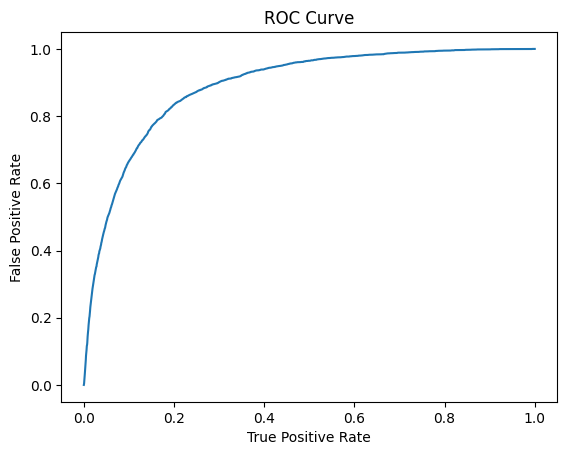

Training set areaUnderROC: 0.8893819685424522


In [33]:
#evaluation metric and curve plot

import matplotlib.pyplot as plt
trainingSummary = lrModel.summary
print(trainingSummary.roc)
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [34]:
#build Decision tree model

from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+-----------+-----+----------------+----------+--------------------+
|age|        job|label|   rawPrediction|prediction|         probability|
+---+-----------+-----+----------------+----------+--------------------+
| 24|blue-collar|  0.0|[25509.0,2051.0]|       0.0|[0.92558055152394...|
| 26|blue-collar|  0.0|[25509.0,2051.0]|       0.0|[0.92558055152394...|
| 26|blue-collar|  0.0|[25509.0,2051.0]|       0.0|[0.92558055152394...|
| 26|blue-collar|  0.0|   [687.0,864.0]|       1.0|[0.44294003868471...|
| 27|blue-collar|  0.0|[25509.0,2051.0]|       0.0|[0.92558055152394...|
| 28|blue-collar|  0.0|[25509.0,2051.0]|       0.0|[0.92558055152394...|
| 28|blue-collar|  0.0|[25509.0,2051.0]|       0.0|[0.92558055152394...|
| 28|blue-collar|  0.0|[25509.0,2051.0]|       0.0|[0.92558055152394...|
| 28|blue-collar|  0.0|[25509.0,2051.0]|       0.0|[0.92558055152394...|
| 28|blue-collar|  0.0|[25509.0,2051.0]|       0.0|[0.92558055152394...|
+---+-----------+-----+----------------+----------+

In [35]:
#perform evaluation

from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.31803264347820626


In [36]:
#build Random forest classifier

from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+-----------+-----+--------------------+----------+--------------------+
|age|        job|label|       rawPrediction|prediction|         probability|
+---+-----------+-----+--------------------+----------+--------------------+
| 24|blue-collar|  0.0|[18.7390990471506...|       0.0|[0.93695495235753...|
| 26|blue-collar|  0.0|[18.5537940035447...|       0.0|[0.92768970017723...|
| 26|blue-collar|  0.0|[18.4907969321040...|       0.0|[0.92453984660520...|
| 26|blue-collar|  0.0|[13.3419565313332...|       0.0|[0.66709782656666...|
| 27|blue-collar|  0.0|[18.6761019757099...|       0.0|[0.93380509878549...|
| 28|blue-collar|  0.0|[18.6478195654083...|       0.0|[0.93239097827041...|
| 28|blue-collar|  0.0|[18.6478195654083...|       0.0|[0.93239097827041...|
| 28|blue-collar|  0.0|[18.4907969321040...|       0.0|[0.92453984660520...|
| 28|blue-collar|  0.0|[18.3415029100364...|       0.0|[0.91707514550182...|
| 28|blue-collar|  0.0|[18.4907969321040...|       0.0|[0.92453984660520...|

In [37]:
#perform evaluation

evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8810640565222376


In [38]:
# create gradient boost classifier

from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+-----------+-----+--------------------+----------+--------------------+
|age|        job|label|       rawPrediction|prediction|         probability|
+---+-----------+-----+--------------------+----------+--------------------+
| 24|blue-collar|  0.0|[1.16259331448166...|       0.0|[0.91094161407168...|
| 26|blue-collar|  0.0|[0.97216461372287...|       0.0|[0.87482698416331...|
| 26|blue-collar|  0.0|[0.97216461372287...|       0.0|[0.87482698416331...|
| 26|blue-collar|  0.0|[0.14434276578440...|       0.0|[0.57167429888516...|
| 27|blue-collar|  0.0|[1.31679675796552...|       0.0|[0.93299255671121...|
| 28|blue-collar|  0.0|[0.99219746995291...|       0.0|[0.87914888606321...|
| 28|blue-collar|  0.0|[0.95894760083232...|       0.0|[0.87190353743128...|
| 28|blue-collar|  0.0|[0.94505156482109...|       0.0|[0.86876728888996...|
| 28|blue-collar|  0.0|[0.93507147529476...|       0.0|[0.86647481717443...|
| 28|blue-collar|  0.0|[0.93967006418349...|       0.0|[0.86753531385544...|

In [39]:
#perform evaluations

evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8958701908726582


In [46]:
#best clustering alorithm is K-means clustering algorithm
#creating a simple data frame for performing clustering algorithm
#

df = spark.createDataFrame([[0, 35.3, 37.5],
                          [1, 41.4, -23.5],
                          [2, 28.3, -13.3],
                          [3, 09.5, -9.0],
                          [4, 62.8, -18.23],
                          [5, 63.8, -18.33],
                          [6, 82.8, -17.23],
                          [7, 52.8, -13.43],
                          [8, 72.8, 48.23],
                          [9, 65.8, 15.43],
                          [10, 42.8, -13.23]],["ID","Att_1", "Att_2"])
df.show()

+---+-----+------+
| ID|Att_1| Att_2|
+---+-----+------+
|  0| 35.3|  37.5|
|  1| 41.4| -23.5|
|  2| 28.3| -13.3|
|  3|  9.5|  -9.0|
|  4| 62.8|-18.23|
|  5| 63.8|-18.33|
|  6| 82.8|-17.23|
|  7| 52.8|-13.43|
|  8| 72.8| 48.23|
|  9| 65.8| 15.43|
| 10| 42.8|-13.23|
+---+-----+------+



In [50]:
#assemble features using vector assembler

from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
vecAssembler = VectorAssembler(inputCols=["Att_1", "Att_2"], outputCol="features")
new_df = vecAssembler.transform(df)
new_df.show()

+---+-----+------+-------------+
| ID|Att_1| Att_2|     features|
+---+-----+------+-------------+
|  0| 35.3|  37.5|  [35.3,37.5]|
|  1| 41.4| -23.5| [41.4,-23.5]|
|  2| 28.3| -13.3| [28.3,-13.3]|
|  3|  9.5|  -9.0|   [9.5,-9.0]|
|  4| 62.8|-18.23|[62.8,-18.23]|
|  5| 63.8|-18.33|[63.8,-18.33]|
|  6| 82.8|-17.23|[82.8,-17.23]|
|  7| 52.8|-13.43|[52.8,-13.43]|
|  8| 72.8| 48.23| [72.8,48.23]|
|  9| 65.8| 15.43| [65.8,15.43]|
| 10| 42.8|-13.23|[42.8,-13.23]|
+---+-----+------+-------------+



In [55]:
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k=2, seed=1)
model = kmeans.fit(new_df.select('features'))
transformed = model.transform(new_df)
transformed.show()

+---+-----+------+-------------+----------+
| ID|Att_1| Att_2|     features|prediction|
+---+-----+------+-------------+----------+
|  0| 35.3|  37.5|  [35.3,37.5]|         0|
|  1| 41.4| -23.5| [41.4,-23.5]|         1|
|  2| 28.3| -13.3| [28.3,-13.3]|         0|
|  3|  9.5|  -9.0|   [9.5,-9.0]|         0|
|  4| 62.8|-18.23|[62.8,-18.23]|         1|
|  5| 63.8|-18.33|[63.8,-18.33]|         1|
|  6| 82.8|-17.23|[82.8,-17.23]|         1|
|  7| 52.8|-13.43|[52.8,-13.43]|         1|
|  8| 72.8| 48.23| [72.8,48.23]|         1|
|  9| 65.8| 15.43| [65.8,15.43]|         1|
| 10| 42.8|-13.23|[42.8,-13.23]|         1|
+---+-----+------+-------------+----------+

